Mustafa Yesilyurt CS 178 HW 2
10/23/19
Prof. Alexander Ihler

## Problem 1: Linear Regression

1.
-------
Load the “data/curve80.txt” data set, and split it into 75%/25% training/test. The first column data [:,0] is the scalar feature value x; the second column data [:,1] is the target value y for each example. For consistency in our results, do not reorder (shuffle) the data (they’re already in a random order), and use the first 75% of the data for training and the rest for testing. Print the shape of these four objects.

In [10]:
from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

np.random.seed(0)
%matplotlib inline

In [11]:
data = np.genfromtxt("data/curve80.txt", delimiter=None)
X = data[:,0]
X = np.atleast_2d(X).T  # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)  # split data set 75/25

print("Shapes of Xtr, Xte, Ytr, Yte, respectively:")
print(Xtr.shape, ", ", Xte.shape, ", ", Ytr.shape, ", ", Yte.shape)

Shapes of Xtr, Xte, Ytr, Yte, respectively:
(60, 1) ,  (20, 1) ,  (60,) ,  (20,)


2.
------
Use the provided linearRegress class to create a linear regression predictor of y given x. You can plot the resulting function by simply evaluating the model at a large number of x values xs. 
a) Plot the training data points along with your prediction function in a single plot.(10 points) 
b) Print the linear regression coefficients (lr.theta) and verify that they match your plot.(5 points) 
c) What is the mean squared error of the predictions on the training and test data?(10 points)

In [12]:
lr = ml.linear.linearRegress( Xtr, Ytr )  # create and train model
xs = np.linspace(0,10,200)     # densely sample possible x-values
xs = xs[:,np.newaxis]          # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict( xs )          # make predictions at xs

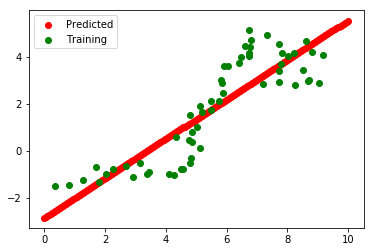

In [13]:
plt.scatter(x=xs, y=ys, c='r', label="Predicted")
plt.scatter(x=Xtr, y=Ytr, c='g', label="Training")
plt.legend()
plt.show()


In [14]:
print(lr.theta)

[[-2.82765049  0.83606916]]


If the first value is the less-than-zero y-intercept and the second the clearly positive slope, then it can be verified that the above coefficients correspond to the regression line in the above plot.

In [15]:
##### NOTE: See Statement of Collaboration for source. I did not write this method of calculating Mean Squared Error.
mean_squared_error = np.square(np.subtract(ys,Ytr)).mean()
print("Mean Squared Error of ys to Ytr: ", mean_squared_error)

Mean Squared Error of ys to Ytr:  10.7074854905


In [9]:
##### NOTE: See Statement of Collaboration for source. I did not write this method of calculating Mean Squared Error.

def mesqerr(Y_1, Y_2):
    return np.square(np.subtract(Y_1,Y_2)).mean()

3.
------
Train polynomial regression models of degree d=1, 3, 5, 7, 10, 15, 18, and:
(a) For each model, plot the learned prediction function f(x). (15 points)
(b) Plot the training and test errors on a log scale (semilogy) as a function of the model degree. (10 points)
(c) What polynomial degree do you recommend? (5 points)



degree:  1


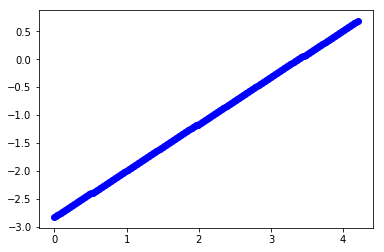

degree:  3


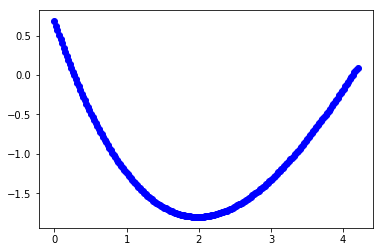

degree:  5


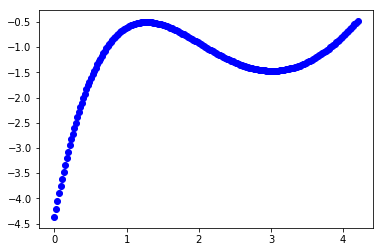

degree:  7


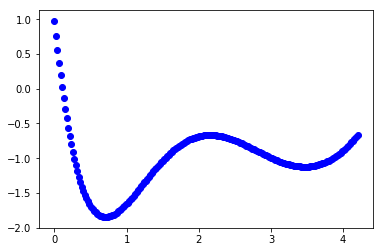

degree:  10


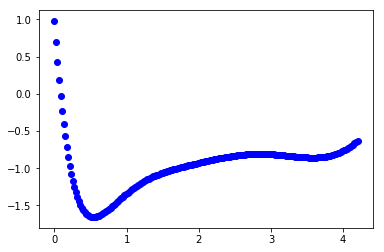

degree:  15


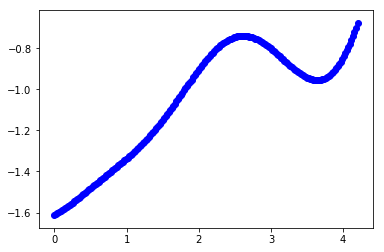

degree:  18


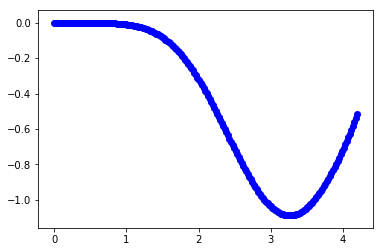

In [23]:
#part a
degree = np.array([1, 3, 5, 7, 10, 15, 18])
for deg in degree:
    XtrP = ml.transforms.fpoly(Xtr, deg, False)
    lr = ml.linear.linearRegress(XtrP, Ytr)
    # Make sure you use the currect space.
    xs = np.linspace(0, 4.2, 200)
    xs = np.atleast_2d(xs).T
    # Notice that we have to transform the predicting xs too.
    xsP = ml.transforms.fpoly(xs, deg, False)
    ys = lr.predict(xsP)
    plt.scatter(x=xs, y=ys, c='b')
    print("degree: ", deg)
    plt.show()

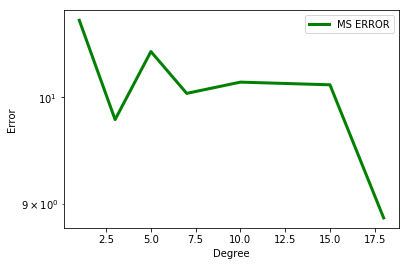

In [27]:
#part b
degree = np.array([1, 3, 5, 7, 10, 15, 18])
mse_error = np.zeros(degree.shape[0])
for i, deg in enumerate(degree):
    XtrP = ml.transforms.fpoly(Xtr, deg, False)

    lr = ml.linear.linearRegress(XtrP, Ytr)
    XteP = ml.transforms.fpoly(Xte, deg, False)
    YteHat = lr.predict(XteP)
    mse_error[i] = mesqerr(YteHat, Yte)
plt.semilogy(degree, mse_error, c='g', lw='3', label='MS ERROR')
plt.xlabel("Degree")
plt.ylabel("Error")
plt.legend()
plt.show()

part c:
Seeing as how the error drastically reduces once the degree reaches 18, that would be the recommended degree.

## Problem 2: Cross-validation

In [38]:
def cross_v(degree, nFolds, Xtr, Ytr):
    mse_error = np.zeros(degree.shape[0])
    for iFold in range(nFolds):
        print("iFold = ", iFold)
        print("")
        for i, deg in enumerate(degree):
            XtrP = ml.transforms.fpoly(Xtr, deg, False)
            Xti, Xvi, Yti, Yvi = ml.crossValidate(XtrP, Ytr, nFolds, iFold)
            
            lr = ml.linear.linearRegress(Xti, Yti)
            YtiHat = lr.predict(Xti) 
            
            mse_error[i] = mesqerr(YtiHat, Yvi)            
        plt.semilogy(degree, mse_error, c='g', lw='3', label='MS ERROR')
        plt.xlabel("Degree")
        plt.ylabel("Error")
        plt.legend()
        plt.show()

1.
--------------

iFold =  0



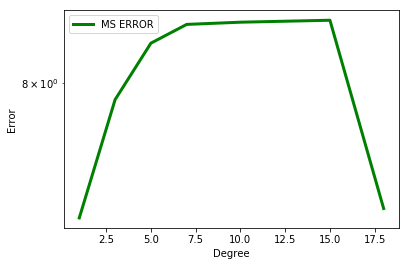

iFold =  1



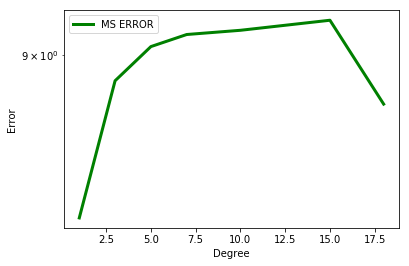

iFold =  2



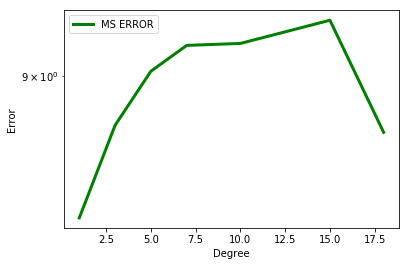

iFold =  3



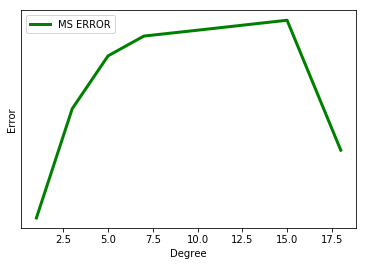

iFold =  4



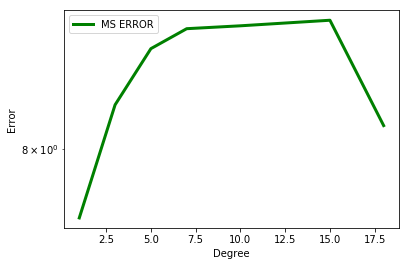

In [39]:
#Plot the MSE of a 5-fold cross validation data set as a function of degree.
degree = np.array([1, 3, 5, 7, 10, 15, 18])
nFolds = 5
cross_v(degree, nFolds, Xtr, Ytr)

2.
------------------
We can see that as we iterate through the folds, there is a difference in how drastically the error drops from degree 15 to 18. Regardless, that drop in error itself is a similarity to the graph from Problem 1. However, in these new graphs, we can observe a degree that consistently has the lowest error, and that is degree 1.

3.
----------------
Based on 2-1, the degree that I would recommend would have to be 1. It repeatedly has the smallest mean squared error.

4.
---------------
For the degree that you picked in step 3, plot (with semilogy) the cross-validation error as the number of folds is varied from nFolds=2,3,4,5,6,10,12,15. What pattern do you observe, and how do you explain why it occurs? (15 points)

The mean squared error data shown in the graph is a set of averages; for example, for nFolds=4, the stored error is the average of the errors across all 4 folds.
mse_error (data used for the graph): 
[ 8.12311341  8.10542101  8.15153017  8.15295194  8.12260834  8.12210891
  8.11073084  8.1282491 ]


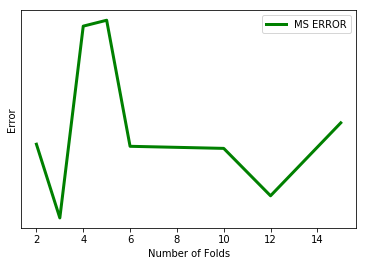

mse_error_2 (no averaging, these are the individual data from each fold of each nFolds value): 
[  7.89233856   8.35388826   7.99721246   7.86865215   8.45039842
   7.56396738   8.65220954   8.23376087   8.15618291   7.42755418
   8.28708769   8.26769602   9.08303265   7.69938916   7.22620336
   8.77759159   8.08791587   7.46660692   9.15403966   8.02329267
   7.02271239   7.25645409   8.87644581   7.5822031    9.37459367
   7.23910426   9.15136499   9.17219246   7.9330528    7.6129655
   6.64924326   7.50942166   7.48080811  10.31117318   7.1827549
   9.12790192   7.62312102   7.07564256   9.98330393   8.54544583
   9.16041113   6.67954255   7.09121885   6.97674261   7.23964976
   7.75349689  10.58934093   6.3351197    9.35624738   7.12146311
   8.59386757   7.62220377   9.9775901   10.11062936   6.2054282
   9.71615469   7.23458358]


In [17]:
folds = np.array([2,3,4,5,6,10,12,15])
deg = 1
mse_error = np.zeros(folds.shape[0])
mse_error_2 = np.zeros(57)
index = 0
for i, nFolds in enumerate(folds):
    totalError = 0.0
    for iFold in range(nFolds):
        #print("nFold = ", nFolds,", iFold = ", iFold)
        #print("")
        XtrP = ml.transforms.fpoly(Xtr, deg, False)
        Xti, Xvi, Yti, Yvi = ml.crossValidate(XtrP, Ytr, nFolds, iFold)

        lr = ml.linear.linearRegress(Xti, Yti)
        YtiHat = lr.predict(Xti) 
        #print("mean squared error: ", mesqerr(YtiHat, Yvi))
        #print("")
        mse_error_2[index] = mesqerr(YtiHat, Yvi)
        index = index + 1

        totalError = totalError + mesqerr(YtiHat, Yvi)
    mse_error[i] = 1.0 * totalError / nFolds
    #print("------------------ mse_error[i] = ", mse_error[i])
    #print("")
print("The mean squared error data shown in the graph is a set of averages; for example, for nFolds=4, the stored error is the average of the errors across all 4 folds.")
print("mse_error (data used for the graph): ")
print(mse_error)
plt.semilogy(folds, mse_error, c='g', lw='3', label='MS ERROR')
plt.xlabel("Number of Folds")
plt.ylabel("Error")
plt.legend()
plt.show()
print("mse_error_2 (no averaging, these are the individual data from each fold of each nFolds value): ")
print(mse_error_2)

The pattern that can be observed in the graph above (but more clearly in the mse_error_2 data set-based graph below) is that, for this degree of 1, the error follows an almost sinusoidal path that increases in amplitude as the number of folds increases. In other words, the error reaches higher local maxima and lower local minima in direct proportion to the value of nFolds. With such a pattern, it can be seen that the iFold value, seemingly almost depending on its pairity (with even numbers being minima and odd being maxima), dictates whether the error is a maximum or minimum. Still, the increase in amplitude can clearly be attributed to the value of nFolds.















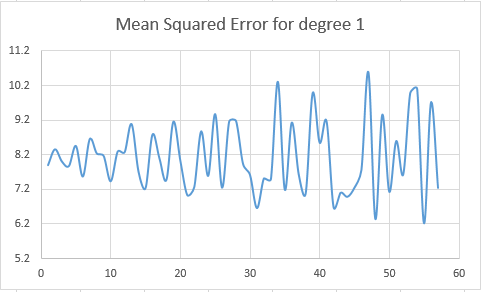

Note that the label on the x-axis is not particularly orthodox. The reason it goes from 1 to 57 is because there are 57 datapoints in mse_error_2, the set off of which this graph is based. The actual x-labels would have two different parameters to them: nFolds value, and then iFold value. In spite of the fact that such labels cannot be seen in this graph, the trend is still visible as the there is sequential progress from (nFolds = 1, iFold = 0) to (nFolds = 15, iFold = 14); the order of the datapoints was maintained in creating the graph using Microsoft Excel.

## Problem 3: Statement of Collaboration
I did not collaborate with any other individuals for this assignment. The only resources I used were the jupyter notebooks provided by our T.A., Julian, during discussion sections in addition to the following website:

https://www.geeksforgeeks.org/python-mean-squared-error/

This site has a snippet of python code under the heading "MSE using Numpy module:" that I used for the mesqerr function I wrote that can be seen near the end of Problem 1, right after the subproblem asking to execute print(lr.theta) and interpret the output but before the series of scatter plot graphs. It is also used later, in Problem 2.